# Importing essential libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Generate two class dataset

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2,n_features=20 , random_state=27)
print(X)
print(y)

[[-0.25820289  1.0198078   1.52456317 ...  0.33272104 -0.17540696
   1.50112422]
 [-0.45816647  0.82872793 -0.65696499 ...  1.2019375  -0.25583476
  -0.19931278]
 [-0.3873777   0.76181785 -1.31035138 ... -1.0332091  -1.68667137
  -0.76683607]
 ...
 [-0.54779315 -0.67453913 -0.83464431 ...  0.57821623 -1.17254773
   1.08301901]
 [ 0.5596188  -0.62502523  1.40453753 ... -1.66951495 -0.29276041
   0.48456871]
 [-1.42487559  0.52714552  0.15786417 ...  3.25163637 -0.54779104
  -1.51033252]]
[1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0

# Split into train-test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Train models

In [4]:
model = LogisticRegression()

# Fit model (Normalization and Scaling)

In [5]:
model.fit(X_train, y_train)

LogisticRegression()

# Predict probabilities

In [6]:
pred_prob = model.predict_proba(X_test)

# AUC_ROC curve for models

In [7]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# AUC Score

In [8]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print("AUC score = ", auc_score)

AUC score =  0.9762374461979914


# Plot AUC_ROC curve

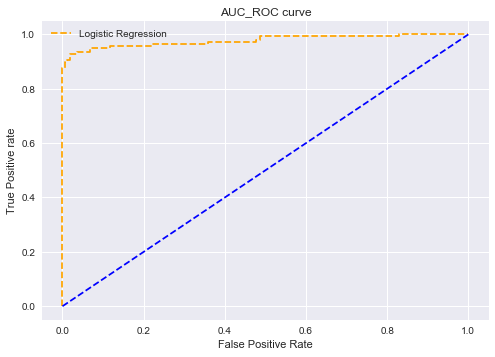

In [9]:
plt.style.use('seaborn')


plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('AUC_ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();